In [2]:
import numpy as np
import matplotlib.pyplot as plt

['c', 'b', 'd', 'e', 'a']
[20, 30, 41, 90, 91]


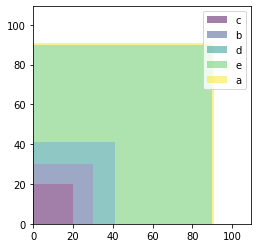

In [7]:
def squarePlot(data, 
               xlabel="", ylabel="", title="", 
               group_labels=("",), scale_factor=1.2,
               cmap = "viridis"):
    """
    data is in the form (val_1, val_2, ...)
    groups must be the same length as data and contains group names
    scale_factor is how much free space you need outside the colored areas (for the legend)
    x_label/y_label are optional labels for the axes
    title is the optional title for the plot
    cmap lets you choose from which colormap to draw uniform distributed colors
    """
    group_labels = [x for _,x in sorted(zip(data, group_labels))]
    data = sorted(data)
    print(group_labels)
    print(data)
    
    fig,ax = plt.subplots()
    ax.set_aspect('equal')
    x = data
    length=len(data)
    cmap_ = plt.get_cmap(cmap)
    my_colors = cmap_(np.linspace(0,1,length))
    
    ax.fill_between(np.arange(x[0]+1),0, data[0], alpha=0.5, 
                    label= group_labels[0], 
                    color=my_colors[0], lw=0)
    for i, stuff in enumerate(zip(data[1:],group_labels[1:], x[1:], my_colors[1:])):
        group, glabel, width, color = stuff
        #vertical
        ax.fill_between(np.arange(x[i], x[i+1]+1),0, data[i+1], alpha=0.5, 
                        label= glabel, color=color, lw=0)
        #horizontal
        ax.fill_between(np.arange(0, x[i]+1), data[i], data[i+1], alpha=0.5, 
                        color=color, lw=0)
        
    ax.set_ylim((0, scale_factor* max(data)))
    ax.set_xlim((0, scale_factor* max(data)))
    plt.title(title)
    plt.legend()
    
data = (91, 30, 20, 41, 90)
group_labels = ('a','b','c', 'd','e')
squarePlot(data, group_labels=group_labels)